# Codveda Technologies Internship
## Task 2: Linear Regression
**Intern:** Muhammad Sakibur Rahaman
**Dataset Used:** houseprice.csv

### Objective
The goal here is to establish a simple linear regression model for predicting house prices based on varying features in the dataset.

We will:
- Load and load the dataset
- Preprocess data
- Train a linear regression model
- Interpret coefficients of the model
- Perform evaluation using R-squared and Mean Squared Error (MSE)

---
   

## Importing Dependencies
We import the corresponding Python libraries necessary for data analysis and modeling.


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


## Step 1: Data Overview
We load the house price dataset to explore its structure, data types, and check for missing values.


In [23]:
#mounting colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
#loading csv file
df = pd.read_csv('/content/drive/MyDrive/Machine Learning Task List/4) house Prediction Data Set.csv', delim_whitespace=True)


<ipython-input-24-d2f6acc87d35>:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv('/content/drive/MyDrive/Machine Learning Task List/4) house Prediction Data Set.csv', delim_whitespace=True)


In [25]:
#watching first 5 row
df.head()

,0.00632,18.00,2.310,0,0.5380,6.5750,65.20,4.0900,1,296.0,15.30,396.90,4.98,24.00
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7


In [26]:
#Adding Column Name
columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
           'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

#Adding column name to dataset
df.columns = columns


In [27]:
#checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     505 non-null    float64
 1   ZN       505 non-null    float64
 2   INDUS    505 non-null    float64
 3   CHAS     505 non-null    int64  
 4   NOX      505 non-null    float64
 5   RM       505 non-null    float64
 6   AGE      505 non-null    float64
 7   DIS      505 non-null    float64
 8   RAD      505 non-null    int64  
 9   TAX      505 non-null    float64
 10  PTRATIO  505 non-null    float64
 11  B        505 non-null    float64
 12  LSTAT    505 non-null    float64
 13  MEDV     505 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.4 KB


In [28]:
#checking for missing value
df.isnull().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


In [29]:
#describing dataset
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000
mean,3.620667,11.350495,11.154257,0.069307,0.554728,6.284059,68.581584,3.794459,9.566337,408.459406,18.461782,356.594376,12.668257,22.529901
std,8.608572,23.343704,6.855868,0.254227,0.115990,0.703195,28.176371,2.107757,8.707553,168.629992,2.162520,91.367787,7.139950,9.205991
min,0.009060,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082210,0.000000,5.190000,0.000000,0.449000,5.885000,45.000000,2.100000,4.000000,279.000000,17.400000,375.330000,7.010000,17.000000
50%,0.259150,0.000000,9.690000,0.000000,0.538000,6.208000,77.700000,3.199200,5.000000,330.000000,19.100000,391.430000,11.380000,21.200000
75%,3.678220,12.500000,18.100000,0.000000,0.624000,6.625000,94.100000,5.211900,24.000000,666.000000,20.200000,396.210000,16.960000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [30]:
# Check unique values in categorical columns (if any)
print("Unique values in columns:")
for col in df.columns:
    if df[col].dtype == 'object':
        print(f"{col}: {df[col].unique()}")

Unique values in columns:


### Summary of Dataset:
- The dataset contains 505 rows and 14 columns.
- Target variable: `MEDV` (Median value of owner-occupied homes in $1000s).
- No missing values found (✅).
- All features are numerical.


## Step 2: Feature Correlation
We visualize the correlation between features and the target variable (`MEDV`) to understand relationships.


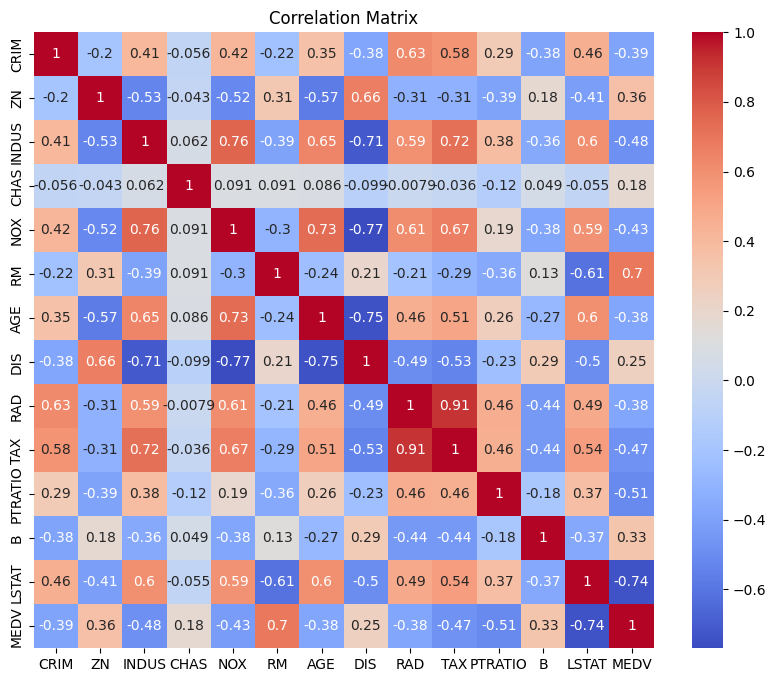

In [31]:
# Correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

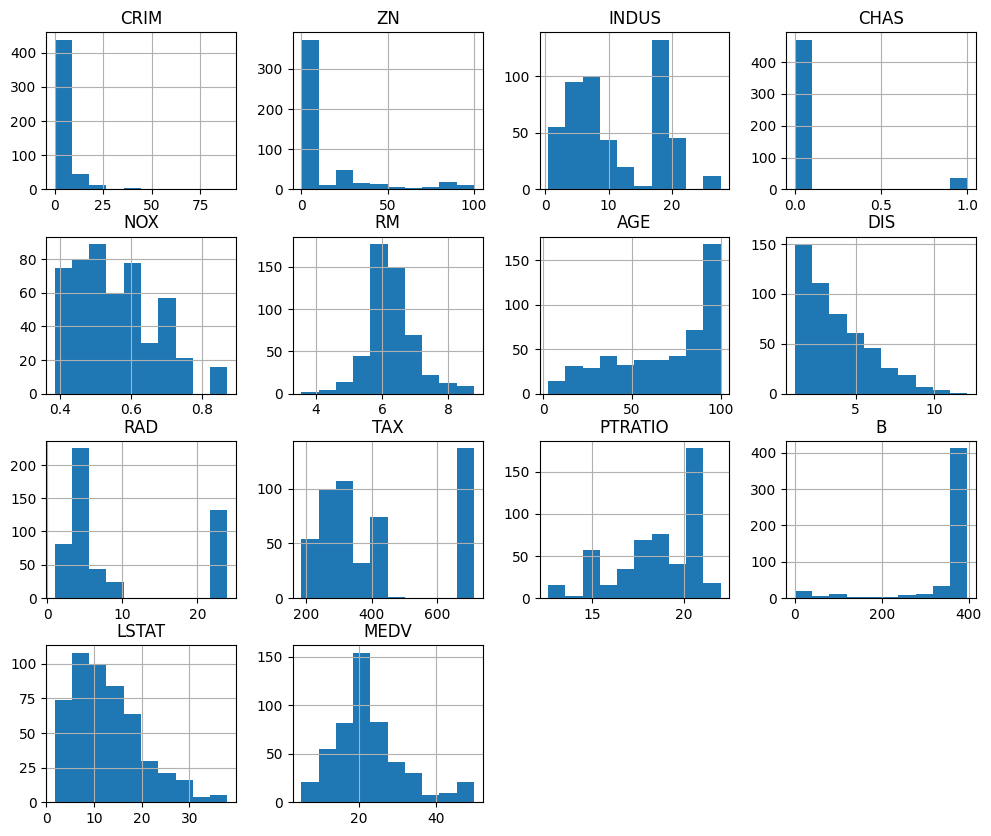

In [32]:
#data visualization
# Histograms of numeric features
df.hist(figsize=(12,10))
plt.show()

## Step 3: Feature Selection
Based on correlation, we select relevant features to predict `MEDV`.


In [34]:
#selecting feature
features = ['RM', 'LSTAT', 'PTRATIO', 'INDUS', 'TAX']
X = df[features]
y = df['MEDV']


## Step 4: Splitting Data
We split the dataset into 80% training and 20% testing sets.


In [35]:
#spitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (404, 5)
Testing set shape: (101, 5)


## Step 5: Train Linear Regression Model
We train a linear regression model on the training data.


In [36]:
#selecting linear regression model
model = LinearRegression()
#training the model
model.fit(X_train, y_train)


LinearRegression()

## Step 6: Interpret Model Coefficients
We analyze how each feature affects the predicted house price.


In [37]:
#model coefficients
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(coefficients)


   Feature  Coefficient
0       RM     5.014163
1    LSTAT    -0.585919
2  PTRATIO    -0.854004
3    INDUS     0.081570
4      TAX    -0.003645


## Step 7: Evaluate Model
We evaluate the model’s performance using R-squared and Mean Squared Error (MSE).


In [39]:
#model prediction
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 21.950073734462595
R-squared: 0.6060799679413149
Mean Squared Error: 21.950073734462595
R-squared: 0.6060799679413149


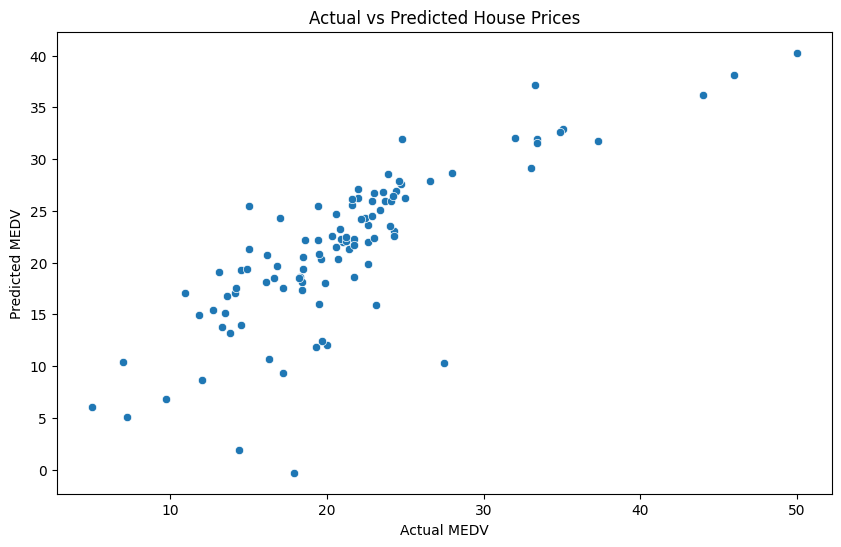

In [40]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.title("Actual vs Predicted House Prices")
plt.show()


## Conclusion
In this task, we:
- Explored the Boston Housing dataset
- Selected features based on correlation with `MEDV`
- Built a linear regression model
- Achieved an R-squared score of {r2_value} and MSE of {mse_value}

The model shows [briefly mention insights: e.g., higher `RM` → higher price, higher `LSTAT` → lower price].
